In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

from sklearn.model_selection import ShuffleSplit
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

%reload_ext version_information
np.__version__

'1.16.4'

In [2]:
digits = datasets.load_digits()

<h3> 2a) </h3>

Bei der Methode der Kreuzvalidierung wird der zufällige Split in Trainings- und Testdatensatz aus Aufgabe 1 mehrere Male wiederholt und der Durchschnitt über mehrere Splits berechnet, um eine genauere Schätzung der wirklichen Treffergenauigkeit zu erhalten. Scikit Learn
stellt dafür bereits eine vordefinierte Methode zur Verfügung: <I>sklearn.model_selection.ShuffleSplit()</I>. Die Methode verwendet die Iteratorsyntax von Python, Beispiele zur Verwendung finden Sie in der Dokumentation dieser Methode.
<I>ShuffleSplit()</I> erzeugt
einen Satz von permutierten Indizes von Trainings- und Testdaten. Erzeugen Sie zunächst 3
Sätze und trainieren Sie für jeden Satz eine SVM mit γ = 0.001 und C = 1 und geben Sie
jeweils die Treffergenauigkeit für Trainings- und Testdatensatz aus. Die Ergebnisse sollten
ähnlich wie in Aufgabe 1b aussehen.

In [3]:
shuffle = ShuffleSplit(n_splits=3, test_size=0.25)

In [4]:
classificator = svm.SVC(gamma=0.001, C=1.0)
for train_index, test_index in shuffle.split(digits.data):
    classificator.fit(digits.data[train_index], digits.target[train_index])
    
    print("TRAINSIZE:", train_index.shape, "TESTSIZE:", test_index.shape, 
          "TRAINSCORE:", classificator.score(digits.data[train_index], digits.target[train_index]), 
          "TESTSCORE:", classificator.score(digits.data[test_index], digits.target[test_index]))

TRAINSIZE: (1347,) TESTSIZE: (450,) TRAINSCORE: 0.9985152190051967 TESTSCORE: 0.9955555555555555
TRAINSIZE: (1347,) TESTSIZE: (450,) TRAINSCORE: 0.9985152190051967 TESTSCORE: 0.9866666666666667
TRAINSIZE: (1347,) TESTSIZE: (450,) TRAINSCORE: 0.9985152190051967 TESTSCORE: 0.9844444444444445


<h3> 2b) </h3>

Statt wie in 2a von Hand vorzugehen gibt es in Scikit Learn die bereits vordefinierte
Methode sklearn.model_selection.cross_val_score(). Wiederholen Sie Ihr Experiment
aus Aufgabe 2a mit 10 Zufallssplits und geben Sie jeweils die Treffergenauigkeit auf dem
Testdatensatz aus. Berechnen Sie die mittlere Treffergenauigkeit (die Kreuzvalidierungsgenauigkeit) und die Standardabweichung des Mittelwerts.

In [5]:
cvs = cross_val_score(classificator, digits.data, digits.target, cv=10)
cvs

array([0.95135135, 1.        , 0.95027624, 0.99444444, 0.98324022,
       0.98882682, 0.99441341, 0.99438202, 0.96610169, 0.96590909])

In [6]:
print('mittlere Treffergenauigkeit:        ', np.mean(cvs),
      '\nStandardabweichung des Mittelwerts: ', np.var(cvs))

mittlere Treffergenauigkeit:         0.9788945294113349 
Standardabweichung des Mittelwerts:  0.00031953853382109975


<h3> 2c) </h3>

Mithilfe der Kreuzvalidierungsgenauigkeit können die optimalen γ- und C-Parameter der
SVM automatisch gefunden werden. Dieser Vorgang heißt Modellselektion. Man führt zu
diesem Zweck eine Gittersuche durch: zunächst wird ein Satz von Werten für γ und C
festgelegt. Für alle Wertepaare wird die Kreuzvalidierungsgenauigkeit bestimmt und dann
die Parameter gewählt, die die höchste Treffergenauigkeit erzielen.

Finden Sie auf diese
Weise für C = 10 den besten Gammawert aus einem Satz von 10 logarithmisch skalierten
Gammawerten, erzeugt mit


In [7]:
gammas = np.logspace(-7, -1, 10)

Verwenden Sie dazu eine Trainings- und Testdatensatzgröße von 500 und 5 Splits (s. Dokumentation von <I>ShuffleSplit</I>) und speichern Sie die Treffergenauigkeit auf dem Trainings- und Testdatensatz für jeden Gammawert und Split. Plotten Sie die Treffergenauigkeitskurve
für jeden Split mit dem Gammawert als Abszisse in einem gemeinsamen Diagramm, jeweils
für die Trainings- und die Testdaten. Diese Kurven werden Validierungskurven genannt. 

In [8]:
shuffle = ShuffleSplit(n_splits=5, test_size=500, train_size=500)

In [9]:
scores = np.zeros((10, 6, 2))
i = 0
for gamma in gammas:
    classificator = svm.SVC(gamma=gamma, C=10.0)
    splitscores = np.zeros((5, 2))
    j = 0
    for train_index, test_index in shuffle.split(digits.data):
        classificator.fit(digits.data[train_index], digits.target[train_index])
        trainscore = classificator.score(digits.data[train_index], digits.target[train_index])
        testscore = classificator.score(digits.data[test_index], digits.target[test_index])
        splitscores[j][0] = trainscore
        splitscores[j][1] = testscore
        j += 1
    scores[i][0] = gamma
    scores[i][1:] = splitscores
    i += 1

In [10]:
#scores

In [11]:
#scores[:,0,0]

In [12]:
#scores[:,1:,0], scores[:,1:,1]

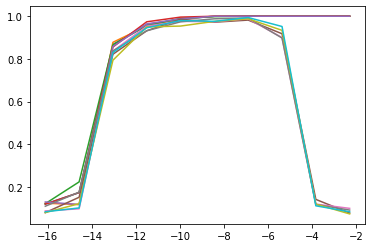

In [13]:
plt.plot(np.log(scores[:,0,0]), scores[:,1:,0], np.log(scores[:,0,0]), scores[:,1:,1])

Für welche Gammawerte erhalten Sie Underfitting, für welche Overfitting? Wo
liegt der optimale Gammawert?

Alle Gammas, bei denen die Erfolgsrate auf dem Trainingssatz 1 ist.

In [14]:
set(scores[:,0,0][np.where(scores[:,1:,0] == np.max(scores[:,1:,0]))[0]])

{0.00021544346900318823,
 0.001,
 0.004641588833612773,
 0.021544346900318822,
 0.1}

Das optimale Gamma, bei dem die Erfolgsrate auf dem Testsatz maximal ist. Alle vorhergehenden ergeben Underfitting, alle folgenden Overfitting.

In [15]:
set(scores[:,0,0][np.where(scores[:,1:,1] == np.max(scores[:,1:,1]))[0]])

{0.001}

<h3> 2d) </h3>

Die Gittersuche lässt sich ebenfalls automatisieren mit <I>sklearn.model_selection.GridSearchCV()</I>. Wir erzeugen dazu ein Gitter aus Wertepaaren für γ und C mit dem
Dictionary

In [16]:
svc_params = {
'C': np.logspace(-1, 2, 4),
'gamma': np.logspace(-4, 0, 5),
}

Dieses Gitter kann direkt an <I>GridSearchCV()</I> als Argument param_grid übergeben werden. Da diese Prozedur sehr zeitaufwendig ist, verkleinern wie den Datensatz auf die ersten 500 Beispiele. Führen Sie für diesen verkleinerten Datensatz eine Gittersuche mithilfe von <I>GridSearchCV()</I> und jeweils 3 Splits (Parameter cv) durch. Den besten Parametersatz erhalten Sie mit <I>GridSearchCV().best_params_</I>, die höchste Treffergenauigkeit
mit <I>GridSearchCV().best_score_</I>. Ausführliche Informationen zu jedem Parameterwertepaar stehen in dem Dictionary <I>GridSearchCV().cv_results_</I>. Nach der Gittersuche führt <I>GridSearchCV()</I> noch ein Training auf dem gesamten Datensatz mit den besten Parametern durch, so dass die resultierende Maschine sofort eingesetzt werden kann.

In [17]:
datas = digits.data[:500]
targets = digits.target[:500]

In [18]:
estimator = svm.SVC()
grid = GridSearchCV(estimator, param_grid=svc_params, cv=3)

In [19]:
grid.fit(datas, targets)

D:\Programme\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([  0.1,   1. ,  10. , 100. ]),
                         'gamma': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [20]:
print(grid.best_params_,'\n', grid.best_score_)

{'C': 100.0, 'gamma': 0.0001} 
 0.928


 Testen Sie diese
Maschine auf den übriggebliebenen Daten.

In [21]:
np.count_nonzero((grid.predict(digits.data[500:]) == digits.target[500:])==True) / len(digits.target[500:])

0.9414032382420972

In [22]:
%version_information numpy, sklearn

Software versions
Python 3.7.3 64bit [MSC v.1915 64 bit (AMD64)]
IPython 7.6.1
OS Windows 10 10.0.18362 SP0
numpy 1.16.4
sklearn 0.21.2
Mon Dec 02 08:13:30 2019 Mitteleuropäische Zeit